In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
actual_st = pd.read_parquet("./stations/actual_stations.parquet")
all_st = pd.read_parquet("./stations/all_stations.parquet")
actual_st = pd.merge(actual_st, all_st, on='sis')
actual_st['lon_y'] = actual_st['lon_y'].replace(',', '.', regex=True).astype('float')
actual_st['lon_e'] = actual_st['lon_y'].apply(lambda x: x if x>0 else x+360)
actual_st['lat_y'] = actual_st['lat_y'].replace(',', '.', regex=True).astype('float')
actual_st['diff_lat'] = actual_st['lat_x'] - actual_st['lat_y']
actual_st['diff_lon'] = actual_st['lon_x'] - actual_st['lon_y']
actual_st.head()

,name_x,sis,lat_x,lon_x,name_y,lat_y,lon_y,hos,country,lon_e,diff_lat,diff_lon
0,Симферополь,33946,45.040278,33.967222,Симферополь,44.7,34.1,181,Украина,34.1,0.340278,-0.132778
1,Фонтан,37791,40.395560,44.668060,Лусаван Чарентсава,40.4,44.6,1792,Армения,44.6,-0.004440,0.068060
2,Ереван,37789,40.212220,44.529720,Ереван,40.1,44.5,907,Армения,44.5,0.112220,0.029720
3,Севан,37709,40.550000,44.933000,Севан,40.6,44.9,1937,Армения,44.9,-0.050000,0.033000
4,Апаран,37699,40.538610,44.390830,Апаран,40.6,44.3,1891,Армения,44.3,-0.061390,0.090830


In [3]:
actual_st.shape

(84, 12)

In [5]:
lon = actual_st['lon_x'].values
lat = actual_st['lat_x'].values
lon[:2], lat[:2]

(array([33.967222, 44.66806 ]), array([45.040278, 40.39556 ]))

In [6]:
lon.max(), lon.mean(), lon.min(), (lon.max()+lon.min())/2

(75.333, 39.33209621428572, 23.68583, 49.509415)

In [7]:
margin = 2
lons_min = lon.min() - margin
lons_max = lon.max() + margin if lon.max() < 180 else lon.max()
lats_min = lat.min() - margin
lats_max = lat.max() + margin
lons_min, lons_max, lats_min, lats_max

(21.68583, 77.333, 36.45, 57.82083)

In [61]:
# TODO Rename this here and in `draw_map`
def _extracted_from_draw_map_19(m):
        m.drawcoastlines(linewidth=0.5, color='blue')
        m.fillcontinents(color='coral', lake_color='aqua')
        m.drawcountries(linewidth=0.5, color='orange')
        m.drawmapboundary(fill_color='aqua')
        m.drawparallels(np.arange(-90., 91., 15.))
        m.drawmeridians(np.arange(-180., 181., 30.))
        # m.shadedrelief()
        lons, lats = m(lon, lat)
        m.scatter(lons, lats, 
                  marker = 'o', 
                  color='r', 
                  zorder=2, 
                  label=1,
                  s=1
                  )
        return m
def draw_map(
        lats_min=-80,
        lats_max=80,
        lons_min=-180,
        lons_max=180,
        resolution='i',
        projection='merc',
        ):
        if projection=='merc':
                m = Basemap(
                        projection=projection,
                        llcrnrlat=lats_min,
                        urcrnrlat=lats_max,
                        llcrnrlon=lons_min,
                        urcrnrlon=lons_max,
                        lat_ts=10,
                        resolution=resolution,
                        )
                return _extracted_from_draw_map_19(m)
        elif projection=='npstere':
                m = Basemap(
                        projection='npstere',
                        resolution=resolution,
                        lon_0=0.,
                        boundinglat=10,                       
                )
                return _extracted_from_draw_map_19(m)

In [62]:
map_net = [
    [0., 180., 80., 360.],
    [0, 0, 80., 180.],
    [-80., 0., 0., 180.],
    [-80., 180., 0., 360.],
]

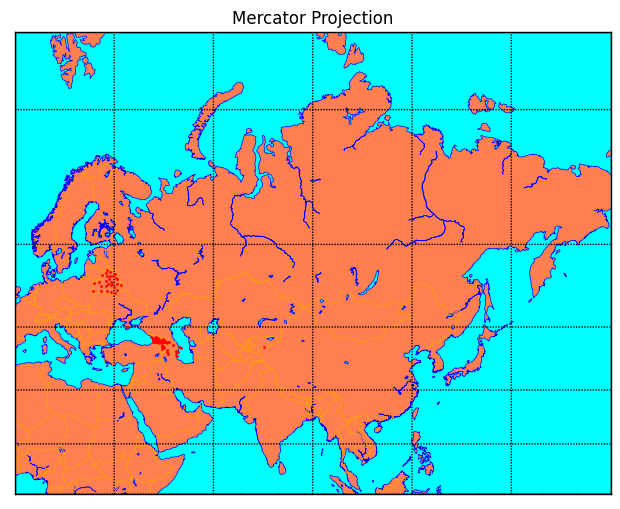

In [63]:
SLICE = 1
projection = 'merc'
# projection = 'npstere'
map_ = draw_map(
    map_net[SLICE][0],
    map_net[SLICE][2],
    map_net[SLICE][1],
    map_net[SLICE][3],
    projection=projection,
    resolution='l',
    )
if projection=='merc':
    plt.title("Mercator Projection")
elif projection=='npstere':
    plt.title("North Pole Projection")
plt.show()

In [ ]:
# import plotly.express as px
# import plotly.graph_objects as go
# # import plotly as py
# import chart_studio.plotly as py
# px.set_mapbox_access_token(open(".mapbox_token").read())

In [ ]:
# fig.update_geos(
#     resolution=50,
#     showcoastlines=True, 
#     coastlinecolor="RebeccaPurple",
#     showland=True, 
#     landcolor="LightGreen",
#     showocean=True, 
#     oceancolor="LightBlue",
#     showlakes=True, 
#     lakecolor="Blue",
#     showrivers=True, 
#     rivercolor="Blue"
# )
# fig.update_geos(projection_type="orthographic")
# fig.update_geos(projection_type="mercator")
# fig = px.scatter_mapbox(geo_df,
#                         lat=geo_df.geometry.y,
#                         lon=geo_df.geometry.x,
#                         hover_name="name",
#                         zoom=1)
# fig.update_geos(
    
# )
# fig.add_trace(
#     go.Scattermapbox(
#         lat=['45.5017'],
#         lon=['-73.5673'],
#         mode='markers',
#         marker=go.scattermapbox.Marker(
#             size=14
#         ),
#         text=['Montreal'],
#     )
# )
# fig.add_trace(
#     go.Scatter(
#         mode='markers',
#         x=[2],
#         y=[4.5],
#         marker=dict(
#             color='LightSkyBlue',
#             size=120,
#             line=dict(
#                 color='MediumPurple',
#                 width=12
#             )
#         ),
#         showlegend=False
#     )
# )
# fig.update_layout(
#     height=600,
#     width=800,
#     margin={"r":0,"t":0,"l":0,"b":0})
# # fig.show()
# # py.plot(fig, filename='figure_geo', auto_open=True)
# fig.write_html('test.html', auto_play=True, 
#             #    auto_open=True
#                )

In [ ]:
lon.mean(), lat.mean()

In [ ]:
d = {'Location': actual_st['name_y'].to_list(), 
     'lat': lat, 
     'long': lon, 
     'z': actual_st['hos'].to_list()
     }
df = pd.DataFrame(data=d)
df.head()

In [ ]:

fig = go.Figure(go.Scattergeo(
    # lat = [df['lat'].min(), df['lat'].max()],
))
fig.update_geos(
    projection_type="mercator",
    # center=dict(lon=((lons_max+lons_min)/2), lat=(lats_min+lats_max)/2),
    center=dict(lon=lon.mean(), lat=lat.mean()),
    # projection_rotation=dict(lon=30, lat=30, roll=30),
    lataxis_range=[lat.mean()-10, lat.mean()+10], 
    # lonaxis_range=[lat.min(), lat.max()], 
    # lataxis_range=[lon.min(), lon.max()],
    lonaxis_range=[lat.mean()-30, lat.mean()+30],
    )
fig.add_scattergeo(
    lat = lat,
    lon = lon,
    # hoverinfo = 'none',
    marker_size = 5,
    marker_color = 'rgb(65, 105, 225)', # blue
    marker_symbol = 'circle',
    hovertext=df['Location'].to_list()
    # showlegend = False,
                     )
fig.add_densitymapbox(
    lat=[df['lat'].min(), df['lat'].max()],
    lon=[df['lat'].min(), df['lat'].max()],
    z=df['z'],
    radius=50,
    opacity=.5,
    showlegend=False,
    showscale=False,
    )
fig.update_geos(
    visible=False, resolution=50, 
    # scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Black",
    showland=True, landcolor="LightGreen",
    )

fig.update_layout(
    height=800,
    width=800,
    margin={"r":0,"t":0,"l":0,"b":0},
    coloraxis_showscale=False,    
    )
fig.update(
    layout_showlegend=False,
    layout_coloraxis_showscale=False
    )
# fig.show()
fig.update_coloraxes(showscale=False)
fig.write_html('test.html', auto_play=True, 
            #    auto_open=True
               )